# Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gmean
import matplotlib
import scipy

# Verificando as versões das bibliotecas
print("Versão do pandas:", pd.__version__)
print("Versão do numpy:", np.__version__)
print("Versão do matplotlib:", matplotlib.__version__)
print("Versão do seaborn:", sns.__version__)
print("Versão do scipy:", scipy.__version__)

Versão do pandas: 2.2.1
Versão do numpy: 1.26.4
Versão do matplotlib: 3.8.4
Versão do seaborn: 0.12.2
Versão do scipy: 1.13.0


# Conhecendo o DataSet

In [2]:
consumo_domestico = pd.read_csv('../data/Coffee_domestic_consumption.csv')
exportacao = pd.read_csv('../data/Coffee_export.csv')
inventorio_cafe_verde = pd.read_csv('../data/Coffee_green_coffee_inventorie.csv')
importacao = pd.read_csv('../data/Coffee_import.csv')
consumo_importadores = pd.read_csv('../data/Coffee_importers_consumption.csv')
producao = pd.read_csv('../data/Coffee_production.csv')
re_exportacao = pd.read_csv('../data/Coffee_re_export.csv')

# EDA - foco exportação | importação

In [203]:
# Verificando a frequência de valores categóricos
consumo_domestico.describe(include=[object])



,Country,Coffee type
count,55,55
unique,55,4
top,Angola,Arabica
freq,1,22


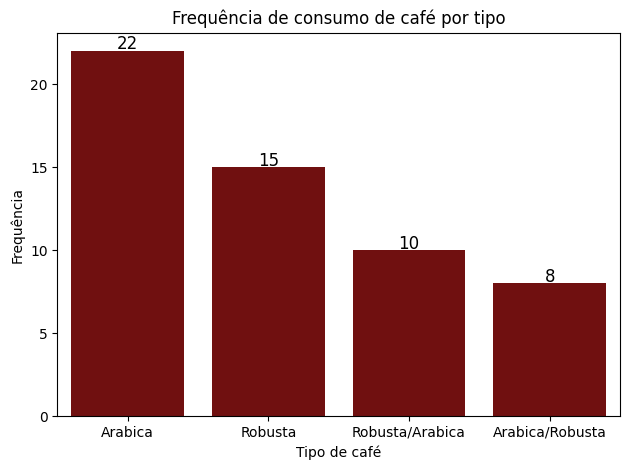

In [204]:

# Contagem agrupada por tipo de café ordenada quantitdade
contagem_por_tipo = consumo_domestico.groupby('Coffee type').size().to_frame(name='count').sort_values(by='count', ascending=False)

# cria o grafico de barras
sns.barplot(x=contagem_por_tipo.index, #definindo o eixo x
            y=contagem_por_tipo['count'],#definindo o eixo Y
            color='#800000')#definindo cor bordô

# Adicionar valores nas barras
for i, v in enumerate(contagem_por_tipo['count']):
    plt.text(i, #posição horizontal do indice do valor
             v + 0.1, # posição vertical, define o deslocamento entre texto e barra
             v, #valor da frequencia mostrado
             ha='center', #alinhamento horizontal "centralizado"
             va='baseline', # alinhamento vertical
             fontsize=12, # tamanho da fonte
             color='black') # cor da fonte, vamos de basicão, preto

# Personalizar o gráfico
plt.xlabel('Tipo de café') # título eixo x
plt.ylabel('Frequência') # título eixo y
plt.title('Frequência de consumo de café por tipo') #Título
plt.xticks(rotation=0) # rotação dos rótulos
plt.tight_layout() #diminui sobreposição

# Exibir o gráfico
plt.show()

#tipo mais consumido Arabica, ou seja, dentre os paises que consomem, este é o grão mais comum


Ao analisar a frequência de consumo de café por país e tipo de grão, não podemos definir com exatidão o grão mais consumido. Isso se deve à forma como a International Coffee Organization (ICO) categoriza os grãos em seu glossário (<a
 href = "https://www.ico.org/glossary.asp"> aqui </a>). Segundo a ICO, existem dois tipos principais de café: Arábica e Robusta. A combinação "Robusta/Arábica" indica que o país produz ambos os tipos de grãos, com a ordem na qual os nomes são listados indicando o grão mais produzido. No entanto, essa informação não é definitiva, pois a produção de café pode variar significativamente entre os países e ao longo do tempo.

 Com base na classificação da ICO, podemos presumir que, quando a ordem dos grãos na combinação "Arábica/Robusta" indica o grão com maior consumo, pelo menos 51% do consumo nos países categorizados como "Arábica/Robusta" se refere ao grão Arábica.


# Importação x Exportação

In [205]:
importacao.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000
2,Belgium/Luxembourg,120900000,104760000,109680000,123780000,135720000,144060000,151560000,152640000,214800000,...,0,0,0,0,0,0,0,0,0,1257900000
3,Bulgaria,16080000,12000000,10920000,23820000,27780000,30900000,16320000,17640000,20520000,...,28920000,33600000,36540000,37260000,40920000,46740000,42420000,44220000,47100000,830700000
4,Croatia,0,0,10080000,9780000,11580000,19200000,19320000,23100000,20340000,...,23460000,23040000,24780000,25200000,26220000,28740000,26340000,26760000,27960000,622080000


In [206]:
exportacao.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,33807709056
3,Burundi,35100000,41280000,38760000,25080000,30480000,31680000,13440000,31740000,22440000,...,13080000,23520000,11700000,15120000,13800000,12240000,10140000,12120000,17580000,646200000
4,Cameroon,156660000,105120000,98760000,42300000,32760000,24420000,33840000,82080000,44760000,...,29400000,37320000,16320000,22500000,23400000,16860000,14700000,17220000,15000000,1399920000


Há valores negativos vistos no Brasil, possa ter vinculo a re-exportação, vamos verificar mais a frente.

In [207]:
re_exportacao.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000
2,Belgium/Luxembourg,53460000,62280000,67860000,76440000,78240000,79680000,89220000,99480000,136200000,...,0,0,0,0,0,0,0,0,0,742860000
3,Bulgaria,9960000,10980000,420000,4200000,6600000,7320000,1560000,1140000,1080000,...,7320000,11040000,11460000,14640000,16500000,19620000,17520000,18720000,21720000,205620000
4,Croatia,0,0,2040000,1860000,1800000,1920000,1020000,1440000,1140000,...,1440000,1440000,1560000,3060000,3780000,5940000,4680000,5160000,5160000,57900000


# exportação

Analisando os valores descritivos apresentados, nota-se que durante os anos de 2014,2015 e 2019 há valores negativos, que podem indicar um erro ou uma devolução. Este caso pode ficar mais evidente gráficamente, vamos validar através de um boxplot.

In [208]:
exportacao.describe().round()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.0,55.0,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,8.800800e+07,8.284691e+07,8.541382e+07,8.200036e+07,7.713600e+07,74044364.0,84729818.0,8.775054e+07,8.753673e+07,9.397091e+07,...,1.114767e+08,1.183015e+08,1.184389e+08,4.627702e+07,4.695557e+07,1.323622e+08,1.303887e+08,1.381047e+08,6.021884e+07,2.851332e+09
std,1.832890e+08,2.019180e+08,2.031566e+08,1.852049e+08,1.719033e+08,147103224.0,163404376.0,1.761129e+08,1.836647e+08,2.146255e+08,...,3.121420e+08,3.032438e+08,3.130926e+08,3.818677e+08,3.713066e+08,3.763857e+08,3.407518e+08,3.927493e+08,3.977899e+08,6.261177e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,1.500000e+06
25%,4.020000e+06,3.960000e+06,2.310000e+06,2.220000e+06,1.860000e+06,2370000.0,1680000.0,2.220000e+06,1.800000e+06,2.220000e+06,...,5.400000e+05,4.500000e+05,3.600000e+05,5.700000e+05,4.500000e+05,6.600000e+05,5.700000e+05,5.100000e+05,3.900000e+05,6.084000e+07
50%,1.578000e+07,9.300000e+06,9.960000e+06,1.308000e+07,9.180000e+06,12000000.0,9360000.0,1.218000e+07,1.284000e+07,1.806000e+07,...,7.920000e+06,8.220000e+06,4.200000e+06,3.720000e+06,3.540000e+06,4.560000e+06,3.480000e+06,6.660000e+06,3.180000e+06,3.160800e+08
75%,1.055700e+08,8.502000e+07,7.971000e+07,7.818000e+07,8.499000e+07,89700000.0,105510000.0,9.048000e+07,9.099000e+07,9.414000e+07,...,8.133000e+07,8.862000e+07,7.818000e+07,5.808000e+07,4.743000e+07,6.420000e+07,4.947000e+07,6.234000e+07,5.625000e+07,2.552670e+09
max,1.016160e+09,1.270980e+09,1.127460e+09,1.070280e+09,1.036380e+09,868080000.0,915060000.0,1.008060e+09,1.088640e+09,1.388940e+09,...,2.028360e+09,1.712940e+09,1.899060e+09,1.565820e+09,1.316640e+09,2.056140e+09,1.855500e+09,2.138220e+09,1.644000e+09,3.380771e+10


### BOXPLOT exportação
Durante todos os anos, observamos diversos outliers, o que é esperado, pois os dados não foram segmentados por país. Esse comportamento é normal devido à média de produção, influenciada por poucos países que possuem um grande volume de exportação. Entretanto, essa observação valida nossa hipótese de uma queda nos anos de 2014, 2015 e 2019. Investigaremos essa questão mais detalhadamente em seções futuras. Assim como vemos na figura abaixo;

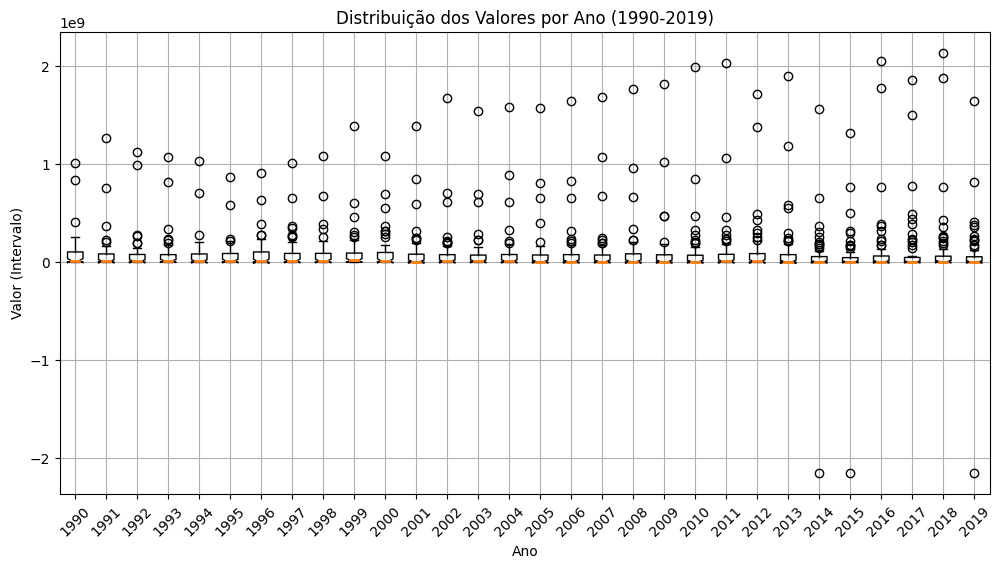

In [209]:

# Extração de dados dos anos (colunas de 1990 a 2019)
ano_data = exportacao.loc[:, '1990':'2019']

# Extração de rótulos dos anos a partir dos nomes das colunas
ano_labels = list(ano_data.columns)

# Criação do boxplot
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da fig
plt.boxplot(
    ano_data,
    labels=ano_labels,
    patch_artist= False,
    notch=True,
    medianprops={"linewidth": 2},  # parência da linha mediana
)

# Personalização do gráfico (opcional)
plt.title('Distribuição dos Valores por Ano (1990-2019)')  # Definir título
plt.xlabel('Ano')  # Definir rótulo do eixo X
plt.ylabel('Valor (Intervalo)')  # Atualizar rótulo do eixo Y
plt.xticks(rotation=45)  # Girar os rótulos do eixo X para melhor legibilidade
plt.grid(True)  # Adicionar linhas de grade para clareza visual

# Exibir o boxplot
plt.show()

### Boxplot de Importação

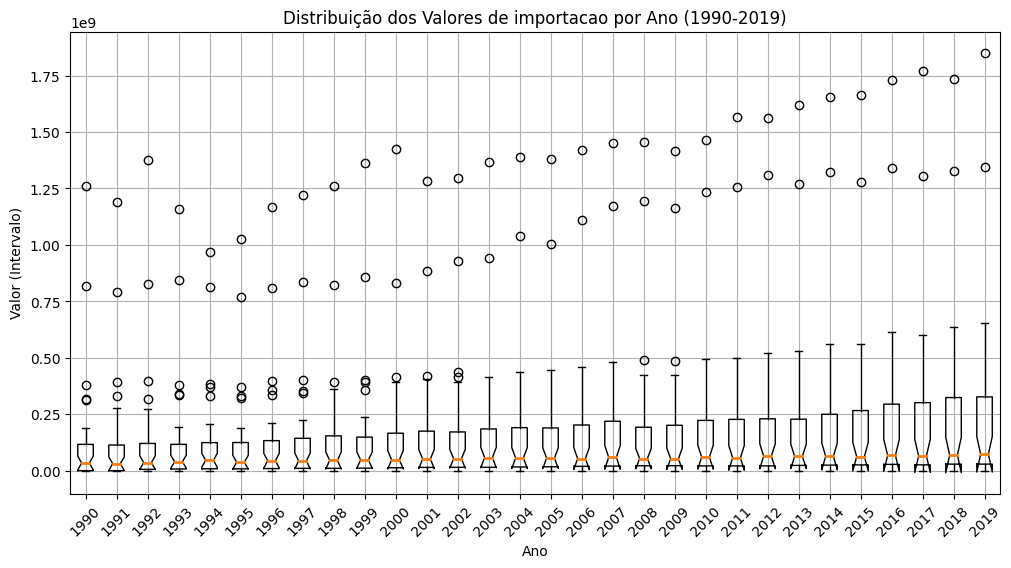

In [210]:

# Extração de dados dos anos (colunas de 1990 a 2019)
ano_data = importacao.loc[:, '1990':'2019']

# Extração de rótulos dos anos a partir dos nomes das colunas
ano_labels = list(ano_data.columns)

# Criação do boxplot
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da fig
plt.boxplot(
    ano_data,
    labels=ano_labels,
    patch_artist= False,
    notch=True,
    medianprops={"linewidth": 2},  # parência da linha mediana
)

# Personalização do gráfico (opcional)
plt.title('Distribuição dos Valores de importacao por Ano (1990-2019)')  # Definir título
plt.xlabel('Ano')  # Definir rótulo do eixo X
plt.ylabel('Valor (Intervalo)')  # Atualizar rótulo do eixo Y
plt.xticks(rotation=45)  # Girar os rótulos do eixo X para melhor legibilidade
plt.grid(True)  # Adicionar linhas de grade para clareza visual

# Exibir o boxplot
plt.show()

## Comparativo Importação x Exportação x Re-exportação

A partir da analise gráfica a seguir, da média anual, notamos que a queda durante 2014, 2015 e 2019 surtiu efeito global, pode-se supor, hipotese 1 - os principais exportadores não foram capaz de exportar as mesmas quantidade durante aquele ano, ou seja o valor esperado foi menor do que o real, situando em um valor negativo. hipotese 2  - Erro no registro das informações, pois não há muito sentido em um valor negativo para exportação, se a Re-exportação não cresce proporcionalmente.

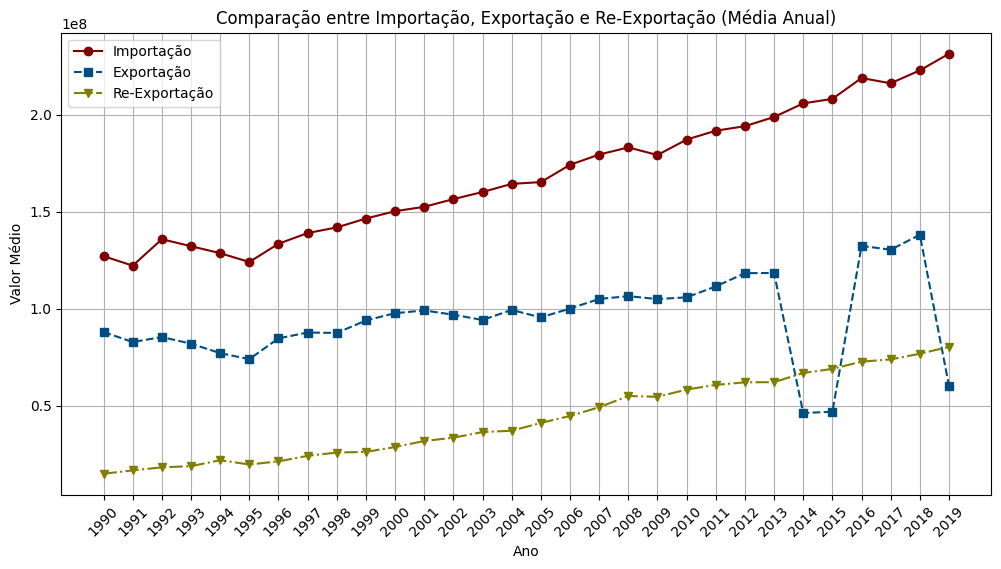

In [211]:

ano_importacao = importacao.loc[:, '1990':'2019']  # extraindo valores anos  dos dados
ano_exportacao = exportacao.loc[:, '1990':'2019']  # ''
ano_re = re_exportacao.loc[:, '1990':'2019']  # ''
ano_labels = list(ano_importacao.columns)  # extraindo rótulo dos anos

# Create the line graph
plt.figure(figsize=(12, 6))  # tamanho da figura

# Plot imports
plt.plot(ano_labels, ano_importacao.mean(axis=0), label='Importação', marker='o', linestyle='-', color='#800000')
# Plot exports
plt.plot(ano_labels, ano_exportacao.mean(axis=0), label='Exportação', marker='s', linestyle='--', color="#004E80")
# plot re exports
plt.plot(ano_labels, ano_re.mean(axis=0), label='Re-Exportação', marker='v', linestyle='-.', color= "#807E00")


# Customize the plot
plt.title('Comparação entre Importação, Exportação e Re-Exportação (Média Anual)')  # Título
plt.xlabel('Ano')  # rótulo do eixo x
plt.ylabel('Valor Médio')  # rótulo do eixo y
plt.xticks(rotation=45)  # angulo do indice
plt.grid(True)  # adiciona linha de grade
plt.legend()  # adiciona legenda

# plot
plt.show()

# Comparativo
Para comparar, adotaremos os seguintes processos, segmentaremos os 5 principais exportadores e importadores, avaliaremos suas taxas de crescimento e criaremos um indicador.

Vale ressaltar que a melhor do desempenho, não caracteriza maior produção, e sim é uma razão individual que apresenta o quão melhor está o país em realação a data inicial(ano de 1990).

1.   criar taxas de crescimento
2.   Separar o Top 5 paises, para importação e exportação
3.   Comparar taxas
4.   Separar por paises que mais exportam e importam e comparar suas taxas de crescimento.
4.   Analisar: Taxa média, desvio padrão e coeficiente de variação.




### Paises que mais importam e exportam
Dentre a importação os United States of America tem o maior valor bruto de importação, totalizando 41.247.240.000. no gráfico abaixo, vemos que em todos os anos os USA tiveram o maior volume de importação.

In [212]:

top_5_importers = importacao.nlargest(5, 'Total_import')

print("Top 5 Países com Maior Total de Importação:")
for index, row in top_5_importers.iterrows():
    print(f"País: {row['Country']} | Total de Importação: {row['Total_import']}")


Top 5 Países com Maior Total de Importação:
País: United States of America | Total de Importação: 42507660000
País:    Germany | Total de Importação: 31481400000
País:    Italy | Total de Importação: 13272120000
País: Japan | Total de Importação: 12422760000
País:    France | Total de Importação: 11972520000


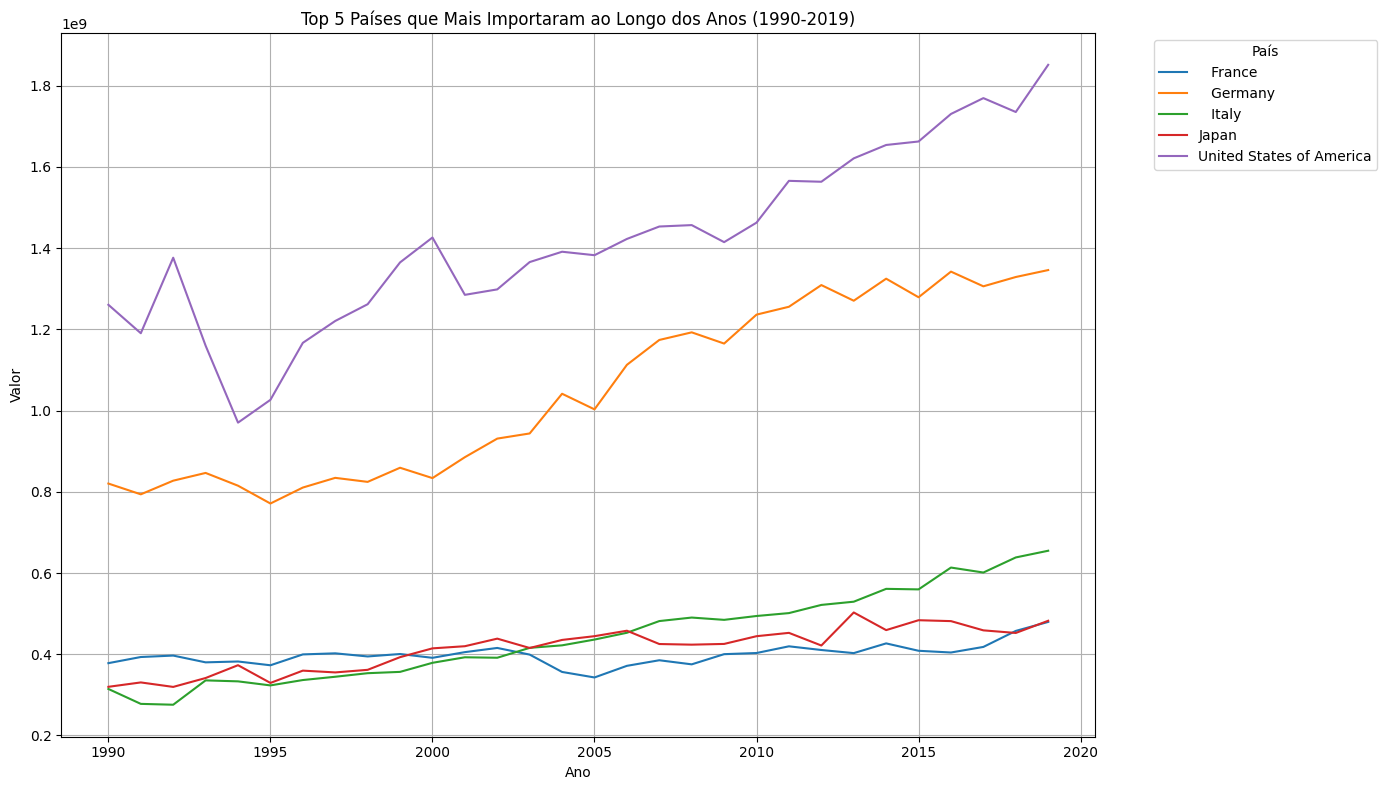

In [213]:

importacao_long = pd.melt(importacao, id_vars=['Country'], var_name='Year', value_name='Value') # Transformar o DataFrame de formato largo para formato longo

importacao_long = importacao_long[importacao_long['Year'].str.isnumeric()]# Remover linhas onde 'Year' não é um número

importacao_long['Year'] = importacao_long['Year'].astype(int)# Converter a coluna Year para inteiro

total_imports = importacao_long.groupby('Country')['Value'].sum().reset_index() # Calcula a soma total das importações para cada país

top_5_countries = total_imports.nlargest(5, 'Value')['Country'] # Selecionar os 5 países que mais importaram

importacao_long_top5 = importacao_long[importacao_long['Country'].isin(top_5_countries)] # Filtrar o DataFrame para incluir apenas os 5 países que mais importaram

# Plotar usando Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=importacao_long_top5, x='Year', y='Value', hue='Country')

# Adicionar título e rótulos aos eixos
plt.title('Top 5 Países que Mais Importaram ao Longo dos Anos (1990-2019)')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


### Paises que mais Exportam

Analisando os principais exportadores, observamos que, entre eles, o Brasil, com o maior volume de exportação, registrou uma queda significativa nos anos de 2014, 2015 e 2019. Essa redução teve impactos globais, uma vez que o déficit gerado pelo principal exportador influenciou negativamente nesses períodos.

In [214]:
top_5_export.head()


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
2,Brazil,1016160000,1270980000,1127460000,1070280000,1036380000,868080000,915060000,1008060000,1088640000,...,2028360000,1712940000,1899060000,-2147483648,-2147483648,2056140000,1855500000,2138220000,-2147483648,32791549056
51,Viet Nam,68700000,72060000,116280000,124320000,163260000,212760000,226740000,370680000,388020000,...,1063020000,1375200000,1183080000,1565820000,1316640000,1783260000,1505520000,1883100000,1644000000,24855780000
6,Colombia,836640000,755940000,993840000,814080000,706080000,588840000,635280000,655140000,675600000,...,464040000,430200000,580200000,657240000,762960000,769860000,779100000,768480000,820320000,19041840000
25,Indonesia,414180000,370260000,276240000,339720000,276300000,236820000,386400000,345300000,335880000,...,235200000,492360000,555300000,370500000,502740000,392700000,491880000,272340000,380040000,10193760000
24,India,118740000,103620000,108960000,126120000,149760000,148020000,186180000,158400000,209220000,...,324840000,302640000,301980000,307860000,315720000,365160000,392520000,358020000,361680000,6815220000


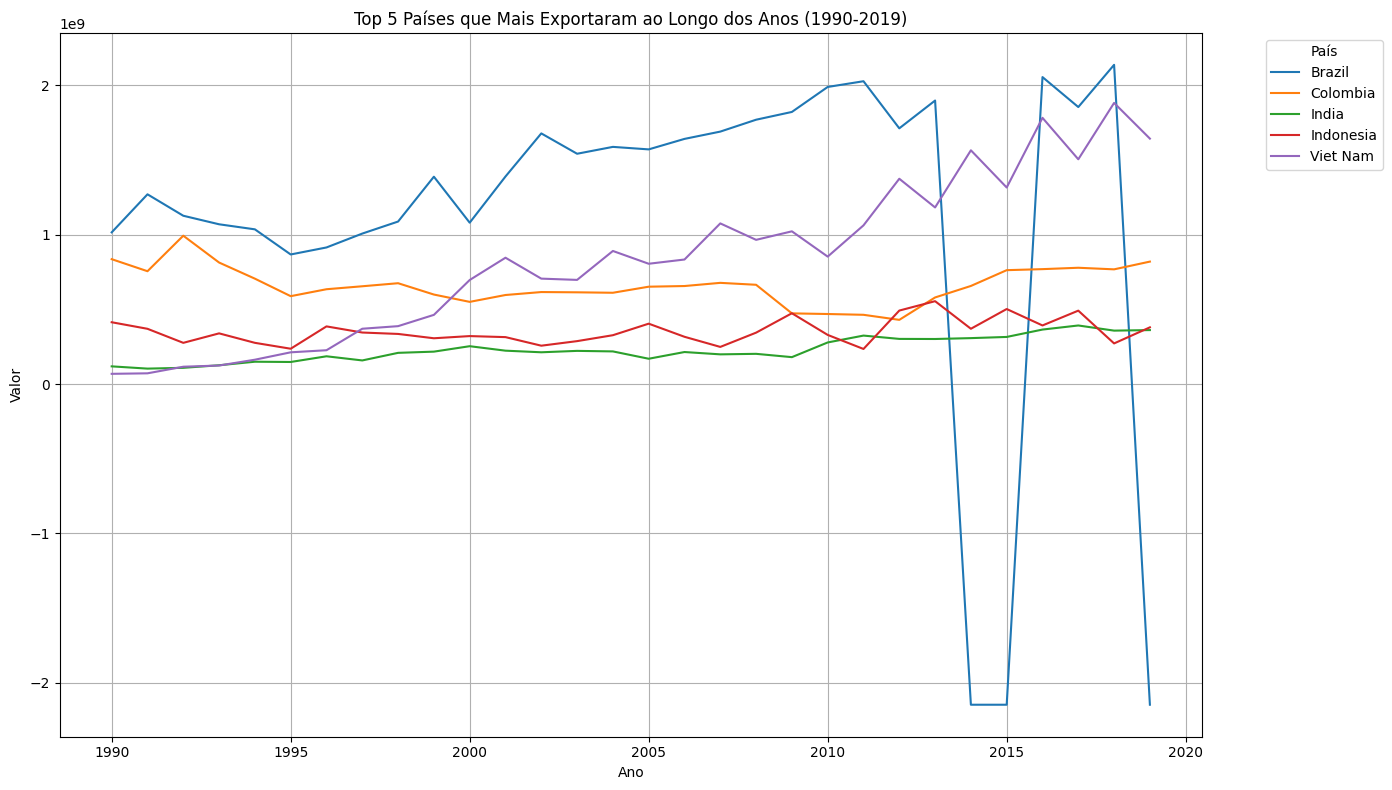

In [215]:
exportacao_long = pd.melt(exportacao, id_vars=['Country'], var_name='Year', value_name='Value')

# Remover linhas onde 'Year' não é um número
exportacao_long = exportacao_long[exportacao_long['Year'].str.isnumeric()]

# Converter a coluna Year para inteiro
exportacao_long['Year'] = exportacao_long['Year'].astype(int)

# Calcular a soma total das exportações para cada país
total_exports = exportacao_long.groupby('Country')['Value'].sum().reset_index()

# Selecionar os 5 países que mais exportaram
top_5_countries = total_exports.nlargest(5, 'Value')['Country']

# Filtrar o DataFrame para incluir apenas os 5 países que mais exportaram
exportacao_long_top5 = exportacao_long[exportacao_long['Country'].isin(top_5_countries)]

# Plotar usando Seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=exportacao_long_top5, x='Year', y='Value', hue='Country')

# Adicionar título e rótulos aos eixos
plt.title('Top 5 Países que Mais Exportaram ao Longo dos Anos (1990-2019)')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Taxa de crescimento

Agora vamos fazer um comparativo com os paises que mais se desenvolveram quanto a importação e exportação. Para importação, pode se ver como clientes em potêncial de crescimento, o que torna possível estimar transações futuras.

## Taxa de crescimento para Importação
Verificaremos as 5 maiores taxas e as taxas dos 5 maiores exportadores.

### Top 5 Taxa de crescimento importação

In [229]:

# Criação de um novo DataFrame para armazenar as taxas de crescimento
taxas_crescimento_df = pd.DataFrame()
taxas_crescimento_df['Country'] = importacao['Country']

# Calculando a taxa de crescimento anual em relação ao ano base de 1990 e adicionando ao novo DataFrame
ano_base = '1990'
for ano in range(1991, 2020):
    ano_atual = str(ano)
    taxas_crescimento_df[ano_atual] = ((importacao[ano_atual] - importacao[ano_base]) / importacao[ano_base]) * 100

# Calculando a média geométrica das taxas de crescimento para cada país
taxas_ajustadas = (taxas_crescimento_df.iloc[:, 1:] / 100) + 1  # Ajustando para cálculo geométrico
taxas_crescimento_df['Media_Geometrica'] = (taxas_ajustadas.apply(gmean, axis=1) - 1) * 100

# Arredondando os valores para duas casas decimais
taxas_crescimento_df = taxas_crescimento_df.round(2)

# Exibindo o DataFrame resultante
taxas_crescimento_df.head()


,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Media_Geometrica
0,Austria,9.47,17.34,-2.34,-24.63,-34.52,-35.64,-31.17,-31.22,-20.21,...,-22.77,-17.07,-17.29,-18.88,-19.52,-20.48,-22.34,-23.99,-22.98,-19.83
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN
2,Belgium/Luxembourg,-13.35,-9.28,2.38,12.26,19.16,25.36,26.25,77.67,-100.00,...,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00
3,Bulgaria,-25.37,-32.09,48.13,72.76,92.16,1.49,9.70,27.61,36.94,...,79.85,108.96,127.24,131.72,154.48,190.67,163.81,175.00,192.91,63.63
4,Croatia,NaN,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,NaN


A fim de calcular a média, optamos pela média geométrica, dado que estamos lidando com taxas de crescimento. Outros tipos de médias não seriam representativos para ilustrar esse crescimento. A média geométrica pode ser obtida através da seguinte fórmula:


 $$Média\ geométrica = \sqrt[n]{x_1 x_2 x_3...x_n} $$

Por que a média geométrica?

Quando tratamos de taxas de crescimento, a média aritmética falha em capturar a verdadeira natureza do fenômeno. Considere um investimento que cresce 10% no primeiro ano, 15% no segundo e 8% no terceiro. A média aritmética indicaria 11%, mas isso desconsidera a multiplicação dos retornos. Aqui é onde entra a média geométrica, revelando um crescimento real de 12% ao ano!

A média geométrica é uma medida de centralidade que se mostra útil quando os dados estão relacionados por uma escala multiplicativa, ao contrário da escala aditiva com a qual estamos mais acostumados na média aritmética.

Para calcular a média geométrica de um conjunto de números, multiplicamos todos os valores juntos e então tiramos a raiz enésima do produto, onde "n" é o número total de valores.

Para realizar este cálculo, podemos utilizar a função **gmean** do pacote **scipy.stats**.



## Importadores com maior potêncial de crescimento

Observamos que Polônia, Tunísia, Romênia, Bulgária e Portugal registraram os maiores aumentos nos últimos 29 anos estudados. Destaca-se a Polônia, que apresentou um crescimento médio total de 480,15%. É importante ressaltar que esse crescimento está relacionado ao desenvolvimento do país em relação a si mesmo durante a base de dados de 1990. O que não reflete a importação bruta total.

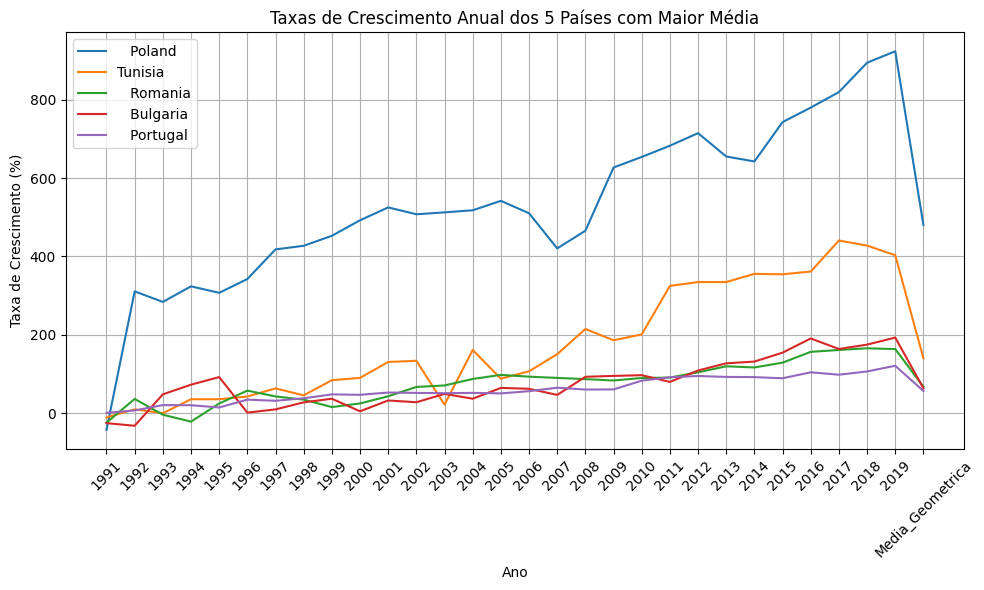

In [217]:

# Ordenando os países pela média geométrica em ordem decrescente e selecionando os cinco primeiros
top_5_paises = taxas_crescimento_df.sort_values(by='Media_Geometrica', ascending=False).head(5)

# Transpondo o DataFrame para que os anos se tornem o índice e os países se tornem as colunas
top_5_paises_transposto = top_5_paises.set_index('Country').T

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
for pais in top_5_paises_transposto.columns:
    plt.plot(top_5_paises_transposto.index, top_5_paises_transposto[pais], label=pais)

plt.title('Taxas de Crescimento Anual dos 5 Países com Maior Média')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [218]:
top_5_paises_transposto.head(30)

Country,Poland,Tunisia,Romania,Bulgaria,Portugal
1991,-42.53,-10.89,-24.21,-25.37,0.91
1992,310.80,9.90,36.43,-32.09,7.07
1993,283.91,0.00,-3.85,48.13,20.65
1994,323.68,35.64,-21.49,72.76,20.29
1995,307.13,35.64,24.66,92.16,14.67
1996,342.30,42.57,57.69,1.49,34.60
1997,417.93,63.37,42.76,9.70,31.70
1998,427.13,45.54,34.62,27.61,38.04
1999,452.64,84.16,15.61,36.94,48.01
2000,492.18,90.10,24.89,4.85,46.92


## Exportadores com maior potêncial de crescimento
Neste caso vemos que o Viet Nam,Lao People's Democratic Republic,Peru , Ghana	Ethiopia, foram os países com maior desenvolvimento índividual de exportação dentre os países. Com destaque do Viet Nam que apresentou um crescimento médio total de 833.82%

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


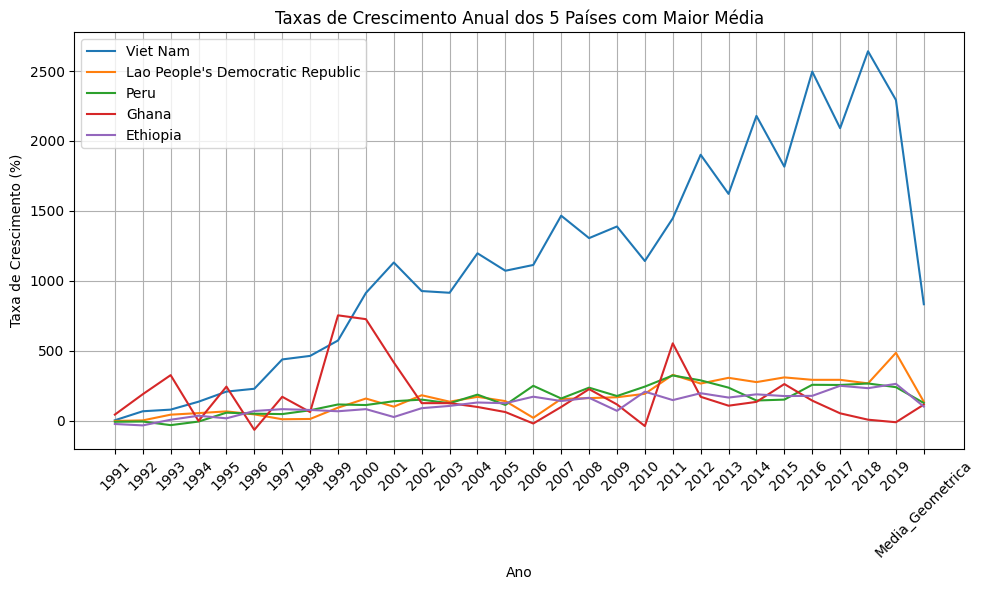

In [219]:

# Criação de um novo DataFrame para armazenar as taxas de crescimento
taxas_crescimento_df = pd.DataFrame()
taxas_crescimento_df['Country'] = exportacao['Country']

# Calculando a taxa de crescimento anual em relação ao ano base de 1990 e adicionando ao novo DataFrame
ano_base = '1990'
for ano in range(1991, 2020):
    ano_atual = str(ano)
    taxas_crescimento_df[ano_atual] = ((exportacao[ano_atual] - exportacao[ano_base]) / exportacao[ano_base]) * 100

# Calculando a média geométrica das taxas de crescimento para cada país
taxas_ajustadas = (taxas_crescimento_df.iloc[:, 1:] / 100) + 1  # Ajustando para cálculo geométrico
taxas_crescimento_df['Media_Geometrica'] = (taxas_ajustadas.apply(gmean, axis=1) - 1) * 100

# Arredondando os valores para duas casas decimais
taxas_crescimento_df = taxas_crescimento_df.round(2)


# Ordenando os países pela média geométrica em ordem decrescente e selecionando os cinco primeiros
top_5_paises = taxas_crescimento_df.sort_values(by='Media_Geometrica', ascending=False).head(5)

# Transpondo o DataFrame para que os anos se tornem o índice e os países se tornem as colunas
top_5_paises_transposto = top_5_paises.set_index('Country').T

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
for pais in top_5_paises_transposto.columns:
    plt.plot(top_5_paises_transposto.index, top_5_paises_transposto[pais], label=pais)

plt.title('Taxas de Crescimento Anual dos 5 Países com Maior Média')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [220]:
#Vamos visualizar p comportamento dos paises com maior crescimento índividual
top_5_paises_transposto.head(30)

Country,Viet Nam,Lao People's Democratic Republic,Peru,Ghana,Ethiopia
1991,4.89,0.00,-5.70,45.45,-21.69
1992,69.26,4.08,-3.98,190.91,-31.66
1993,80.96,44.90,-29.86,327.27,8.66
1994,137.64,56.12,-4.34,0.00,37.34
1995,209.69,68.37,59.28,245.45,18.81
1996,230.04,46.94,51.95,-63.64,71.14
1997,439.56,12.24,49.14,172.73,84.36
1998,464.80,14.29,76.38,63.64,78.49
1999,574.85,94.90,117.83,754.55,69.27
2000,914.67,160.20,113.76,727.27,84.54


## O Top 5 maiores importadores e exportadores

### TOP 5 Importadores


In [194]:
# Calcular o total bruto de exportação para cada país
importacao['Total_import'] = importacao.loc[:, '1991':'2019'].sum(axis=1)

# Ordenar os países pelo total bruto de exportação e selecionar os cinco primeiros
top_5_importadores = importacao.nlargest(5, 'Total_import')

# Criação de um novo DataFrame para armazenar as taxas de crescimento
taxas_crescimento_df = pd.DataFrame()
taxas_crescimento_df['Country'] = top_5_importadores['Country']

# Calculando a taxa de crescimento anual em relação ao ano base de 1990 e adicionando ao novo DataFrame
ano_base = '1990'
for ano in range(1991, 2020):
    ano_atual = str(ano)
    taxas_crescimento_df[ano_atual] = ((importacao[ano_atual] - importacao[ano_base]) / importacao[ano_base]) * 100

# Calculando a média geométrica das taxas de crescimento para cada país
taxas_ajustadas = (taxas_crescimento_df.iloc[:, 1:] / 100) + 1  # Ajustando para cálculo geométrico
taxas_crescimento_df['Media_Geometrica'] = (taxas_ajustadas.apply(gmean, axis=1) - 1) * 100

# Arredondando os valores para duas casas decimais
taxas_crescimento_df = taxas_crescimento_df.round(2)

# Exibindo o DataFrame resultante
taxas_crescimento_df.head()



,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Media_Geometrica
34,United States of America,-5.56,9.20,-7.99,-23.02,-18.57,-7.44,-3.16,0.11,8.28,...,24.21,24.03,28.60,31.22,31.90,37.28,40.37,37.66,46.87,11.51
11,Germany,-3.23,0.86,3.19,-0.64,-5.99,-1.20,1.71,0.50,4.75,...,53.07,59.58,54.88,61.50,55.92,63.62,59.21,62.00,64.08,26.35
15,Italy,-11.67,-12.34,6.71,5.95,2.79,6.98,9.56,12.34,13.37,...,59.39,65.80,68.31,78.37,77.95,95.04,91.15,102.96,108.20,38.02
28,Japan,3.38,-0.08,6.77,16.64,2.98,12.46,11.09,13.08,22.83,...,41.54,31.80,57.24,43.66,51.28,50.58,43.47,41.46,50.84,29.51
10,France,4.00,4.94,0.52,1.08,-1.38,5.70,6.40,4.36,5.95,...,10.97,8.57,6.54,12.87,8.06,6.94,10.57,21.00,26.85,5.53


### TOP 5 Exportadores

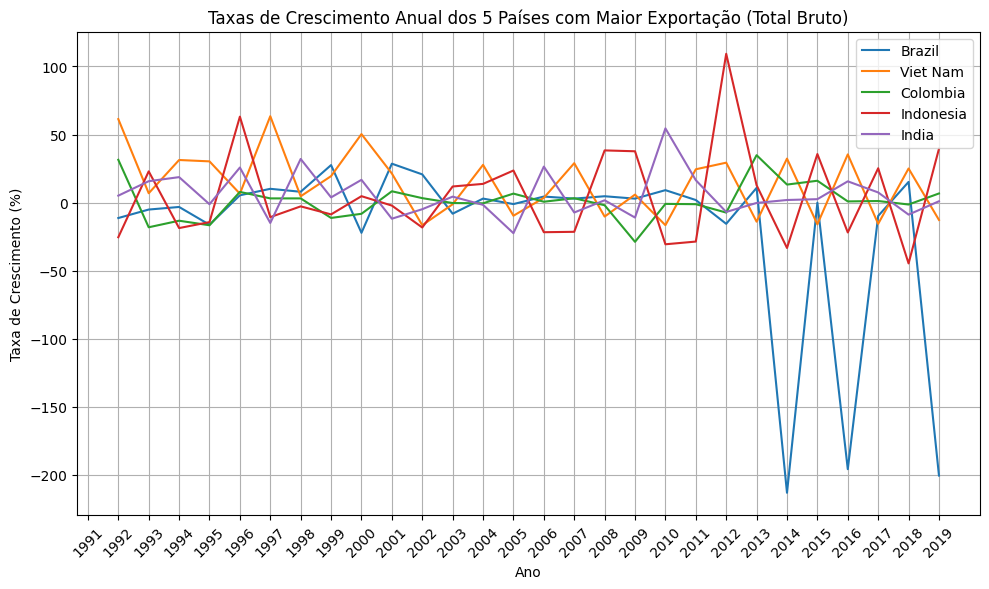

In [37]:
# Calcular o total bruto de exportação para cada país
exportacao['Total_export'] = exportacao.loc[:, '1991':'2019'].sum(axis=1)

# Ordenar os países pelo total bruto de exportação e selecionar os cinco primeiros
top_5_exportadores = exportacao.nlargest(5, 'Total_export')

# Selecionar apenas as colunas dos anos de 1991 a 2019 para os cinco países
top_5_exportadores_anos = top_5_exportadores.loc[:, '1991':'2019']

# Calcular a taxa de crescimento para esses cinco países
taxas_crescimento_top5_exporat = top_5_exportadores_anos.pct_change(axis=1) * 100

# Adicionar a coluna 'País' de volta aos dados
taxas_crescimento_top5_export['País'] = top_5_exportadores['Country']

# Transpondo os dados para que os anos se tornem o índice e os países se tornem as colunas
taxas_crescimento_top5_export_transposto = taxas_crescimento_top5_export.set_index('País').T

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
for pais in taxas_crescimento_top5_export_transposto.columns:
    plt.plot(taxas_crescimento_top5_export_transposto.index, taxas_crescimento_top5_export_transposto[pais], label=pais)

plt.title('Taxas de Crescimento Anual dos 5 Países com Maior Exportação (Total Bruto)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [195]:
# Calcular o total bruto de exportação para cada país
exportacao['Total_export'] = exportacao.loc[:, '1991':'2019'].sum(axis=1)

# Ordenar os países pelo total bruto de exportação e selecionar os cinco primeiros
top_5_exportadores = exportacao.nlargest(5, 'Total_export')



# Criação de um novo DataFrame para armazenar as taxas de crescimento
taxas_crescimento_df = pd.DataFrame()
taxas_crescimento_df['Country'] = top_5_exportadores['Country']

# Calculando a taxa de crescimento anual em relação ao ano base de 1990 e adicionando ao novo DataFrame
ano_base = '1990'
for ano in range(1991, 2020):
    ano_atual = str(ano)
    taxas_crescimento_df[ano_atual] = ((exportacao[ano_atual] - exportacao[ano_base]) / exportacao[ano_base]) * 100

# Calculando a média geométrica das taxas de crescimento para cada país
taxas_ajustadas = (taxas_crescimento_df.iloc[:, 1:] / 100) + 1  # Ajustando para cálculo geométrico
taxas_crescimento_df['Media_Geometrica'] = (taxas_ajustadas.apply(gmean, axis=1) - 1) * 100

# Arredondando os valores para duas casas decimais
taxas_crescimento_df = taxas_crescimento_df.round(2)

# Exibindo o DataFrame resultante
taxas_crescimento_df.head()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:197: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Media_Geometrica
2,Brazil,25.08,10.95,5.33,1.99,-14.57,-9.95,-0.80,7.13,36.69,...,99.61,68.57,86.89,-311.33,-311.33,102.34,82.60,110.42,-311.33,NaN
51,Viet Nam,4.89,69.26,80.96,137.64,209.69,230.04,439.56,464.80,574.85,...,1447.34,1901.75,1622.10,2179.21,1816.51,2495.72,2091.44,2641.05,2293.01,833.82
6,Colombia,-9.65,18.79,-2.70,-15.61,-29.62,-24.07,-21.69,-19.25,-28.32,...,-44.54,-48.58,-30.65,-21.44,-8.81,-7.98,-6.88,-8.15,-1.95,-22.84
25,Indonesia,-10.60,-33.30,-17.98,-33.29,-42.82,-6.71,-16.63,-18.90,-25.90,...,-43.21,18.88,34.07,-10.55,21.38,-5.19,18.76,-34.25,-8.24,-17.35
24,India,-12.73,-8.24,6.22,26.12,24.66,56.80,33.40,76.20,83.02,...,173.57,154.88,154.32,159.27,165.89,207.53,230.57,201.52,204.60,86.22
